<a href="https://colab.research.google.com/github/Gilangp/Machine-learning/blob/main/week%2011/TG1_JS11_Gilang_Purnomo_2341720042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas LAB**

Nama  : Gilang Purnomo

NIM   : 2341720042

Absen : 14

1. Buatlah model SVM dengan menggunakan data `voice.csv` dengan ketentuan,

    a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

    - Gunakan model dengan kernel linier.

    - Gunakan model dengan kernel polynomial.

    - Gunakan model dengan kernel RBF.

2. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

In [ ]:
# import library
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
voice = pd.read_csv("voice.csv")
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
# encode label menjadi numerik (male=1, female=0)
le = LabelEncoder()
voice['label'] = le.fit_transform(voice['label'])

X = voice.drop(columns=['label'])
y = voice['label']

# normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# split data dengan rasio 70:30 dan 80:20
splits = {'70:30': 0.3, '80:20': 0.2}
kernels = ['linear', 'poly', 'rbf']

# menyimpan hasil akurasi
results = {'Kernel': [], '70:30': [], '80:20': []}

In [ ]:
for kernel in kernels:
    results['Kernel'].append(kernel)
    for ratio_label, test_size in splits.items():
        # split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=test_size, random_state=42, stratify=y
        )

        # model SVM
        model = SVC(kernel=kernel, random_state=42)
        model.fit(X_train, y_train)

        # prediksi dan hitung akurasi
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        # hasil akurasi
        results[ratio_label].append(round(acc, 5))

In [ ]:
df_hasil = pd.DataFrame(results)
print("=== HASIL PERFORMA MODEL SVM ===")
df_hasil.head()

=== HASIL PERFORMA MODEL SVM ===


,Kernel,70:30,80:20
0,linear,0.97897,0.97476
1,poly,0.95899,0.95741
2,rbf,0.98318,0.98265


2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/week 11/images/training"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/week 11/images/test"

In [ ]:
# load dataset
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')
    img_list = []
    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))
    return img_list

In [ ]:
# load dataset training dan testing
train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)

In [ ]:
print(f"Total data training: {len(train_img)}")
print(f"Total data testing: {len(test_img)}")

Total data training: 240
Total data testing: 160


In [ ]:
# pra-pengolahan data (Resize + Label Encoding)
def standarized_input(image):
    return cv.resize(image, (256, 256))

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    std_list = []
    for img, label in img_list:
        std_img = standarized_input(img)
        num_label = label_encoder(label)
        std_list.append((std_img, num_label))
    return std_list

Ukuran gambar: (256, 256, 3)
Label numerik: 1


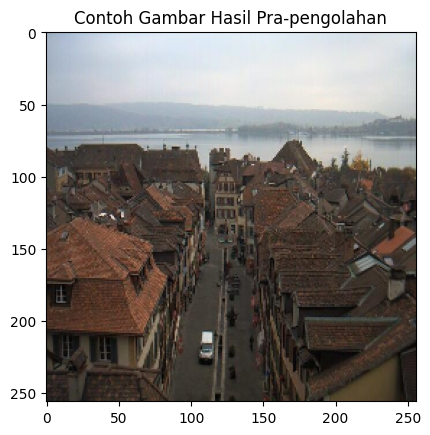

In [ ]:
train_std = preprocess(train_img)
test_std = preprocess(test_img)

rand = np.random.randint(0, len(train_std))
print(f"Ukuran gambar: {train_std[rand][0].shape}")
print(f"Label numerik: {train_std[rand][1]}")
plt.imshow(train_std[rand][0])
plt.title("Contoh Gambar Hasil Pra-pengolahan")
plt.show()

In [ ]:
# ekstraksi fitur histogram
def extract_histogram_features(img_list):
    features = []
    labels = []
    for img, label in img_list:
        # Flatten histogram dari 3 channel
        hist = cv.calcHist([img], [0, 1, 2], None, [32, 32, 32],
                            [0, 256, 0, 256, 0, 256])
        hist = cv.normalize(hist, hist).flatten()
        features.append(hist)
        labels.append(label)
    return np.array(features), np.array(labels)

In [ ]:
X_train, y_train = extract_histogram_features(train_std)
X_test, y_test = extract_histogram_features(test_std)

print("Bentuk data training :", X_train.shape)
print("Bentuk data testing  :", X_test.shape)

Bentuk data training : (240, 32768)
Bentuk data testing  : (160, 32768)


In [ ]:
# split data ulang (80:20)
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [ ]:
# model SVM kernel RBF + Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10, 50],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=1)
grid.fit(X_train_split, y_train_split)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Accuracy: 0.9895833333333334


In [ ]:
# evaluasi model terbaik
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

print(f"Akurasi pada data test: {acc_test:.4f}")

Akurasi pada data test: 0.9500


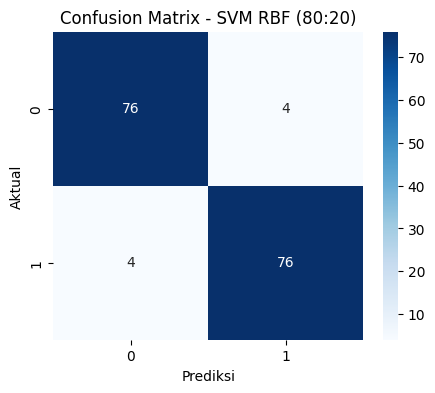


Classification Report:
              precision    recall  f1-score   support

       Night       0.95      0.95      0.95        80
         Day       0.95      0.95      0.95        80

    accuracy                           0.95       160
   macro avg       0.95      0.95      0.95       160
weighted avg       0.95      0.95      0.95       160



In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - SVM RBF (80:20)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Night', 'Day']))